# Data Collection and Preprocessing:

Explanation:
    Loading Dataset: The script begins by loading CSV file into a pandas DataFrame.
    Handling Missing Values: If dataset has missing values, I need to decide how to handle them, e.g., filling with the mean or forward fill.
    Feature Engineering:
        One-Hot Encoding: This is used for categorical variables like 'Education', 'Device Type', etc., converting them into a format that can be provided to machine learning algorithms.
        Scaling: Numerical features like 'Age', 'Tiredness', etc., are scaled to have a mean of 0 and a standard deviation of 1. This is important for models that are sensitive to the scale of input features.
    Combining Transformations: The script uses a ColumnTransformer to apply these transformations in a pipeline.
    Conversion to DataFrame: After transformation, the data is converted back into a DataFrame for better readability and further analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Loading Dataset
df = pd.read_csv('1.csv')

In [2]:
# Preprocessing: Handle missing values
#df.fillna(method='fill', inplace=True)

# Feature Engineering
# 1. One-hot encoding for categorical variables
categorical_features = ['Education', 'Device Type', 'Region', 'Gender', 'Age', 'Household Income']
one_hot = OneHotEncoder()

# 2. Scaling for numerical features (excluding 'Age' which is now categorical)
numerical_features = ['Tiredness', 'Compulsive behavior', 'Panic attacks', 
                      'Mood swings', 'Obsessive thinking', 'Depression', 'Anxiety', 
                      'Lack of concentration', 'How many days were you hospitalized for your mental illness',
                      'Annual income (including any social welfare programs) in USD', 'I am unemployed', 'I live with my parents'
                     , 'I have my regular access to the internet', 'I am legally disabled', 'I have been hospitalized before for my mental illness',
                     'I identify as having a mental illness', 'I am currently employed at least part-time']

scaler = StandardScaler()

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot, categorical_features)
    ])

# Apply transformations
df_transformed = preprocessor.fit_transform(df)

# Convert transformed data back to DataFrame
column_names = preprocessor.transformers_[0][2] + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
df_transformed = pd.DataFrame(df_transformed, columns=column_names)

# Output the transformed DataFrame
print(df_transformed.head())

   Tiredness  Compulsive behavior  Panic attacks  Mood swings  \
0  -0.655122            -0.308860       2.407471    -0.358906   
1   1.526434            -0.308860       2.407471    -0.358906   
2  -0.655122            -0.308860      -0.415374    -0.358906   
3  -0.655122            -0.308860      -0.415374    -0.358906   
4   1.526434             3.237709       2.407471     2.786244   

   Obsessive thinking  Depression   Anxiety  Lack of concentration  \
0            2.632218    1.698152  1.529706               2.351470   
1           -0.379908    1.698152  1.529706               2.351470   
2           -0.379908   -0.588875 -0.653720              -0.425266   
3           -0.379908   -0.588875 -0.653720              -0.425266   
4            2.632218    1.698152  1.529706               2.351470   

   How many days were you hospitalized for your mental illness  \
0                                          -0.232310             
1                                          -0.232310    

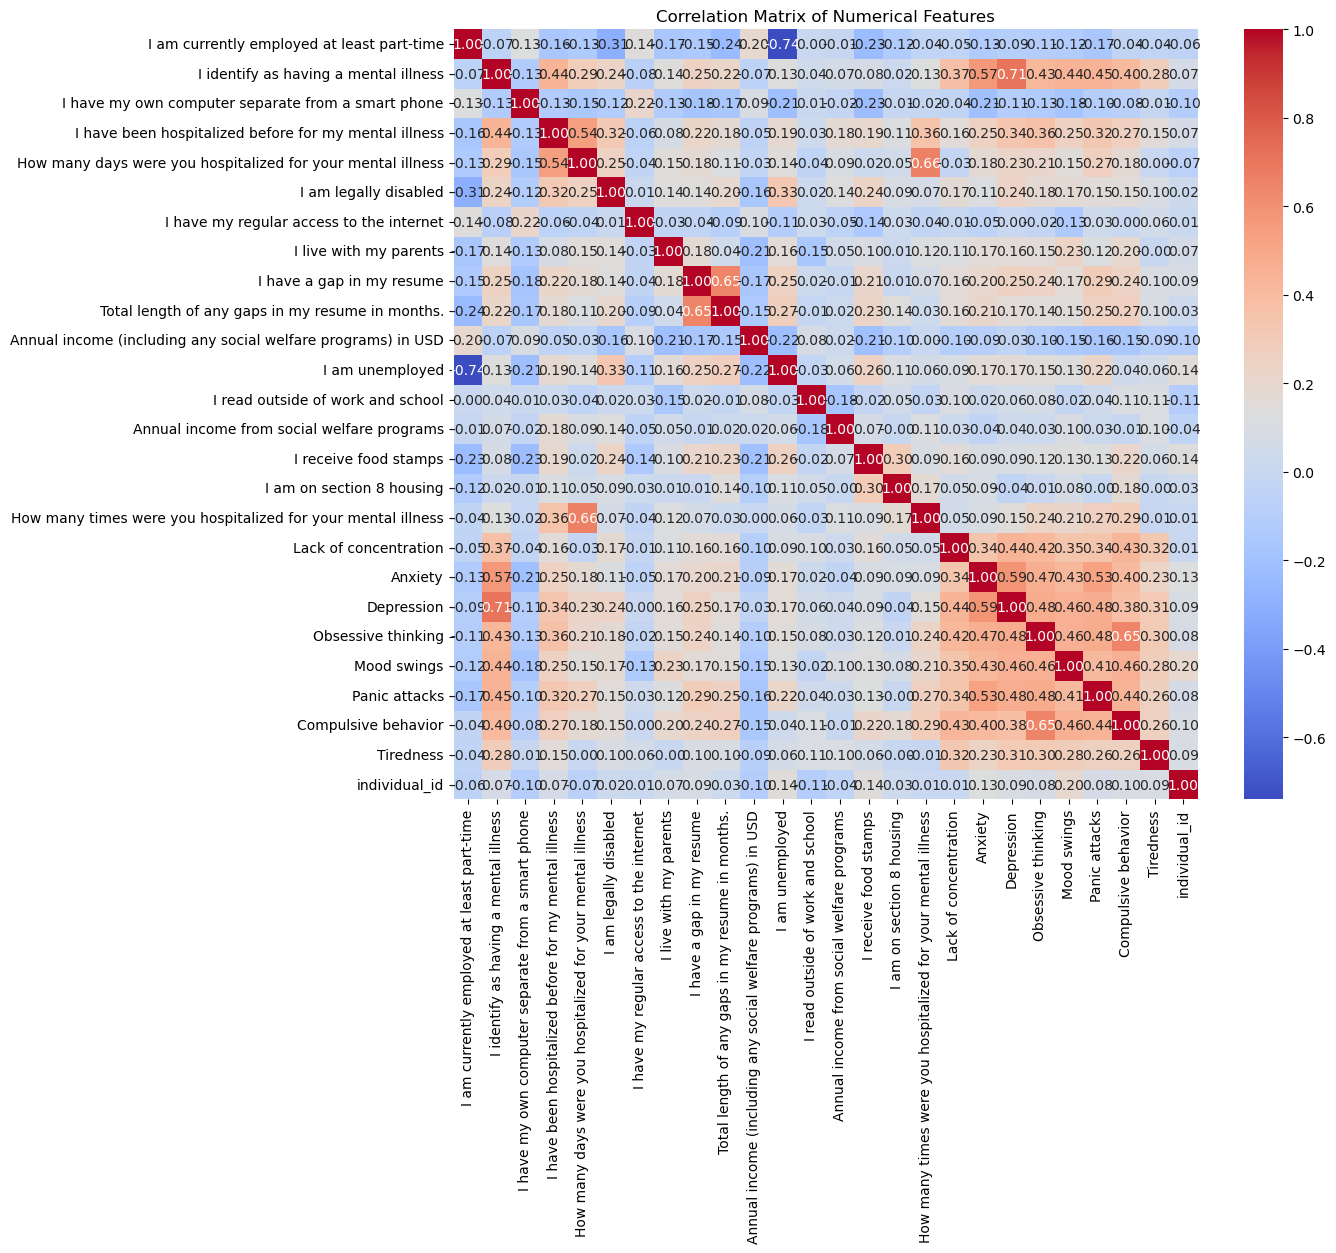

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# For the correlation matrix, we need to include only the numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

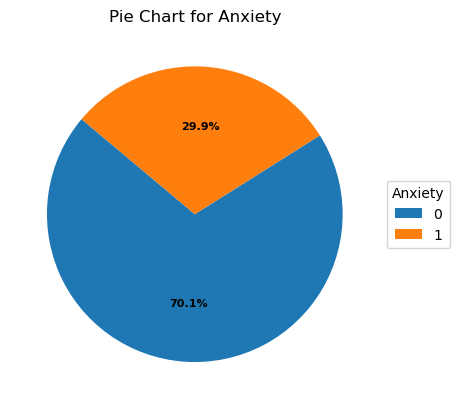

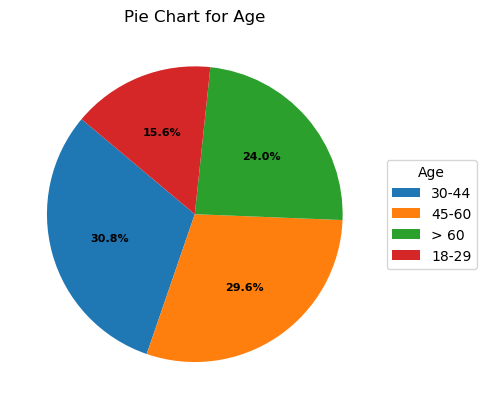

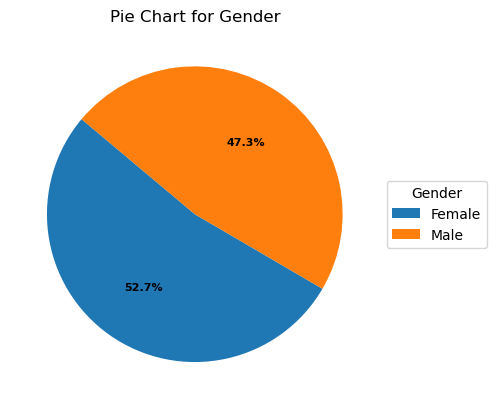

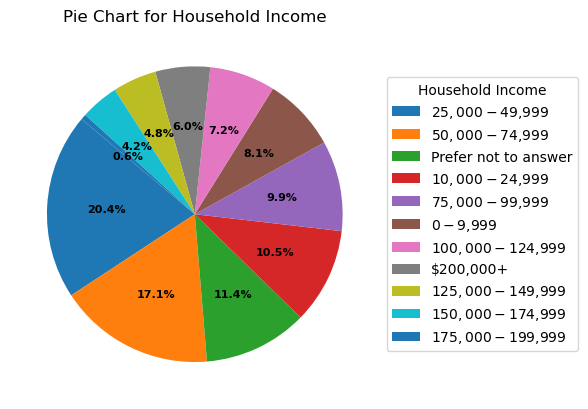

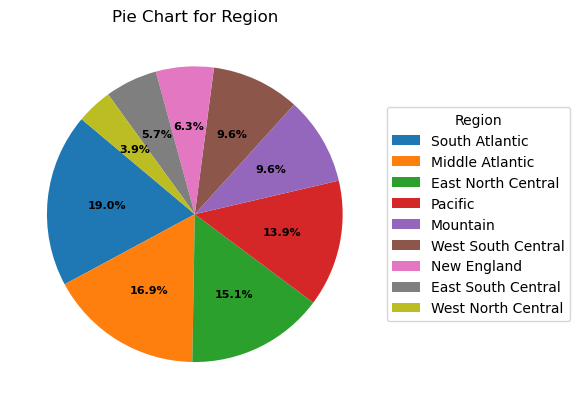

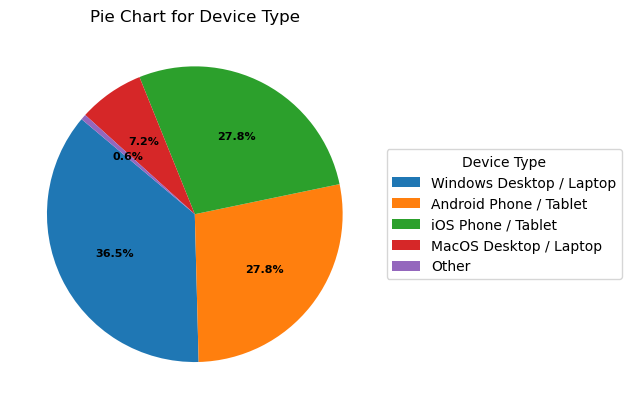

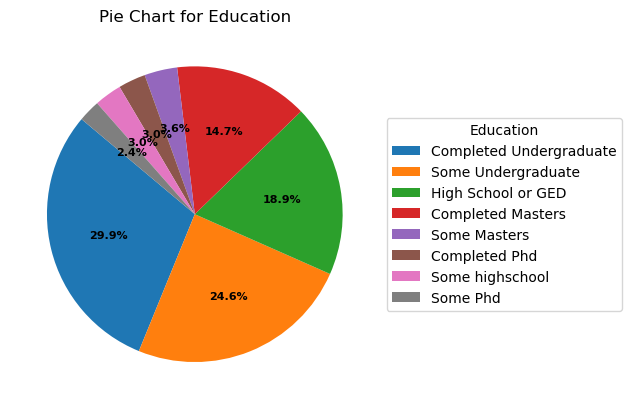

In [4]:
# Defining a function to create a pie chart with a legend for a given column
def create_pie_chart_with_legend(column_name):
    # Counting the frequency of each category
    counts = df[column_name].value_counts()
    
    # Ploting pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=140)
    
    # Drawing a legend with colored squares
    ax.legend(wedges, counts.index, title=column_name, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(f'Pie Chart for {column_name}')
    
    plt.show()

# Creating pie charts with legends for 'Anxiety', 'Age', 'Gender'
create_pie_chart_with_legend('Anxiety')
create_pie_chart_with_legend('Age')
create_pie_chart_with_legend('Gender')
create_pie_chart_with_legend('Household Income')
create_pie_chart_with_legend('Region')
create_pie_chart_with_legend('Device Type')
create_pie_chart_with_legend('Education')

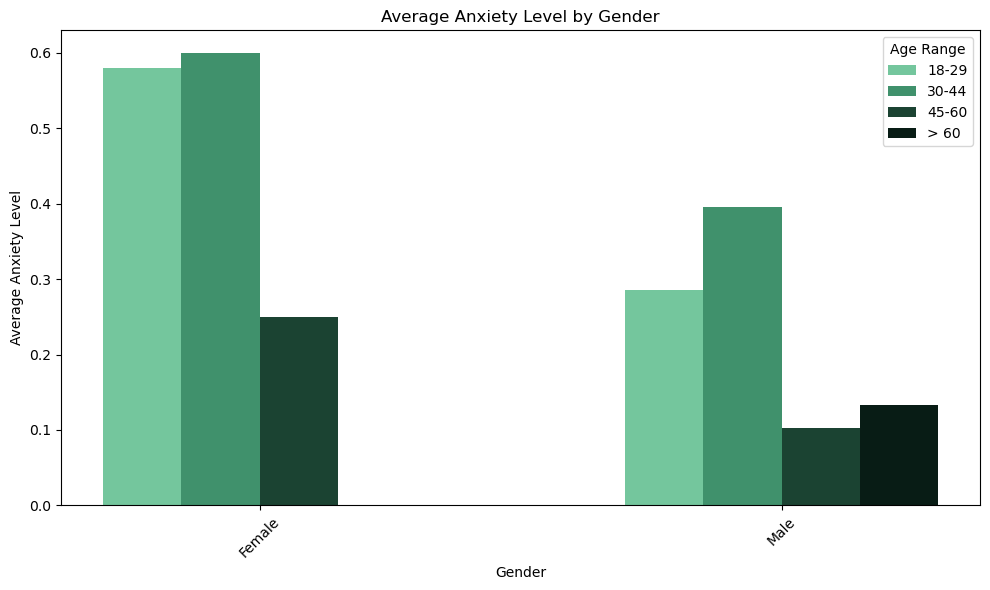

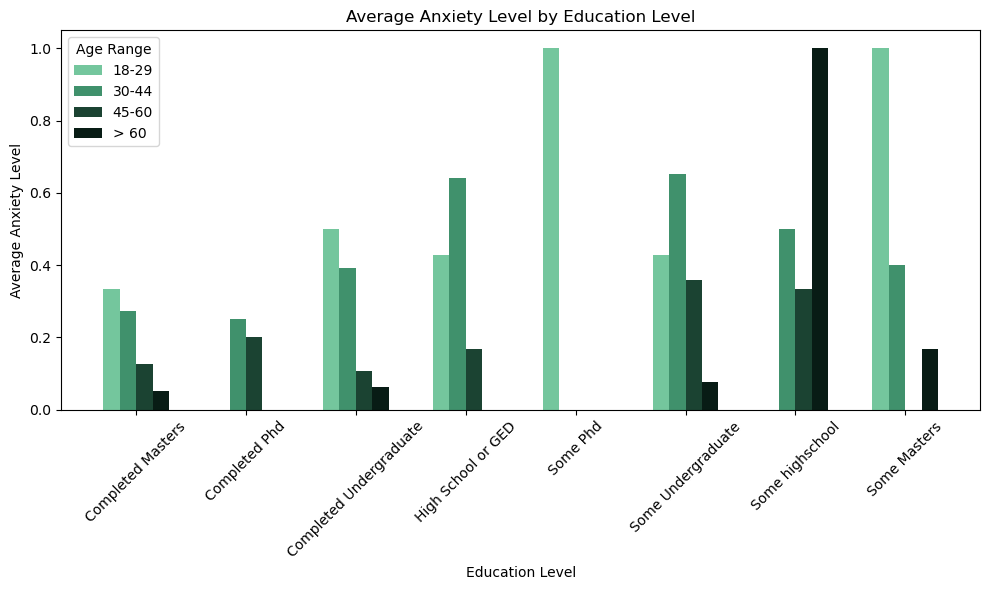

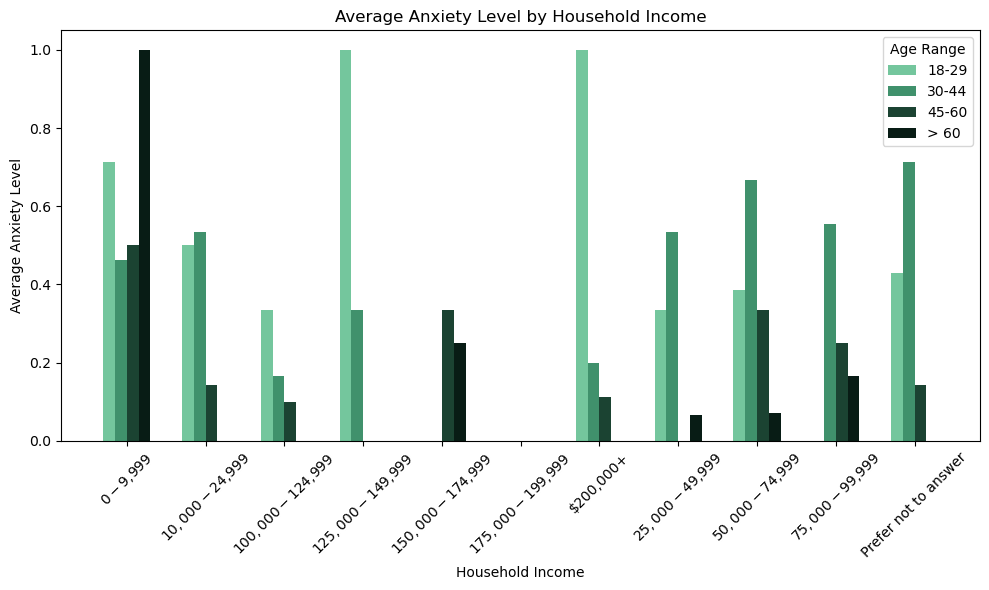

In [5]:
age_ranges = ['18-29', '30-44', '45-60', '> 60']

# Defining colors for each age range for the bars in the bar chart
colors = ['#74C69D', '#40916C', '#1B4332', '#081C15']

# Creating pivot tables for each category
gender_pivot = df.pivot_table(index='Gender', columns='Age', values='Anxiety', aggfunc='mean')
education_pivot = df.pivot_table(index='Education', columns='Age', values='Anxiety', aggfunc='mean')
income_pivot = df.pivot_table(index='Household Income', columns='Age', values='Anxiety', aggfunc='mean')

def plot_clustered_barchart(pivot_table, category_name, age_ranges, colors):
    bar_width = 0.15  # Width of the bars
    n_categories = len(pivot_table.index)
    positions = np.arange(n_categories)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Checking and printing which age ranges are in the pivot_table columns
    #print(f"Available age ranges in pivot_table for {category_name}: {pivot_table.columns.tolist()}")

    for i, age_range in enumerate(age_ranges):
        # Checking if the age range is found in the columns and print if it is
        if age_range in pivot_table.columns:
            #print(f"Plotting age range {age_range}")
            ax.bar(positions + i * bar_width, pivot_table[age_range], bar_width,
                   label=age_range, color=colors[i])
        else:
            print(f"Age range {age_range} not found in pivot_table columns for {category_name}")

    ax.set_xlabel(category_name)
    ax.set_ylabel('Average Anxiety Level')
    ax.set_title(f'Average Anxiety Level by {category_name}')
    ax.set_xticks(positions + bar_width * (len(age_ranges) - 1) / 2)
    ax.set_xticklabels(pivot_table.index)
    ax.legend(title='Age Range')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ploting for each category using the correct pivot table
plot_clustered_barchart(gender_pivot, 'Gender', age_ranges, colors)
plot_clustered_barchart(education_pivot, 'Education Level', age_ranges, colors)
plot_clustered_barchart(income_pivot, 'Household Income', age_ranges, colors)

In [6]:
#Divide and sort dataset based on 'Education'
education_levels = df['Education'].unique()

sorted_subsets = {}  # Dictionary to store sorted subsets

for level in education_levels:
    subset = df[df['Education'] == level]
    # Sortting the subset: 'Anxiety' in ascending order
    sorted_subset = subset.sort_values(by='Anxiety')
    sorted_subsets[level] = sorted_subset

print(sorted_subsets['Completed Masters'].head())

     I am currently employed at least part-time  \
13                                            1   
320                                           1   
157                                           1   
164                                           1   
166                                           1   

     I identify as having a mental illness          Education  \
13                                       0  Completed Masters   
320                                      0  Completed Masters   
157                                      0  Completed Masters   
164                                      0  Completed Masters   
166                                      0  Completed Masters   

     I have my own computer separate from a smart phone  \
13                                                   1    
320                                                  1    
157                                                  1    
164                                                  1    
166    

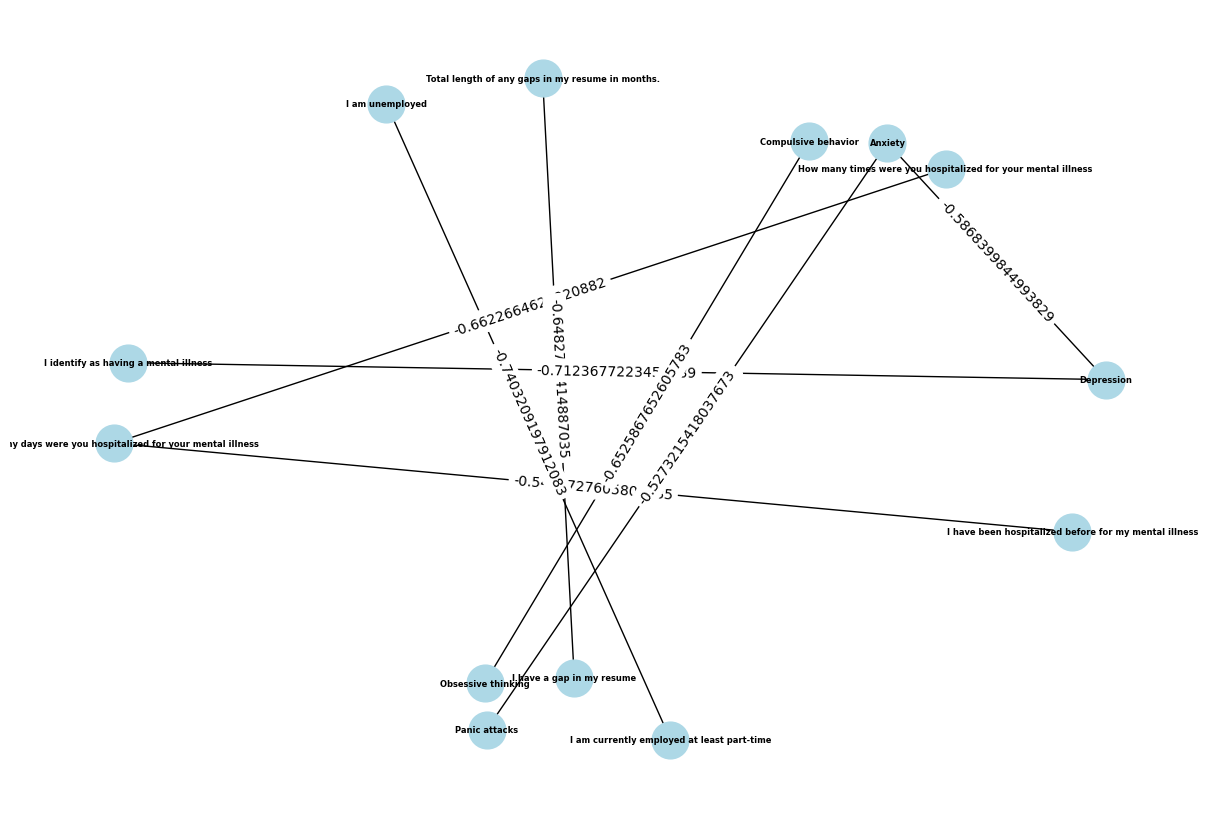

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Creating the graph
G = nx.Graph()

correlation_threshold = 0.5
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if not np.isnan(corr_matrix.iloc[i, j]) and abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=-abs(corr_matrix.iloc[i, j]))

# Computing the minimum spanning tree using Kruskal's Algorithm
mst = nx.minimum_spanning_tree(G)

# Defining the position of nodes using a layout algorithm
pos = nx.spring_layout(mst)

# Setting the size of the plot
plt.figure(figsize=(12, 8))

# Drawing the minimum spanning tree
nx.draw(mst, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=6, font_weight='bold')

# Definning edge labels
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)

plt.show()

In [8]:
import random

def generate_patient_simulation(df):
    simulated_patient = {}
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            simulated_patient[column] = random.choice(df[column].dropna().values)
        else:
            simulated_patient[column] = np.random.choice(df[column].dropna().unique())
    return simulated_patient

# Generating 10 simulated patients
simulated_patients = [generate_patient_simulation(df) for _ in range(10)]
print(simulated_patients)

[{'I am currently employed at least part-time': 0, 'I identify as having a mental illness': 0, 'Education': 'Completed Phd', 'I have my own computer separate from a smart phone': 1, 'I have been hospitalized before for my mental illness': 0, 'How many days were you hospitalized for your mental illness': 0.0, 'I am legally disabled': 0, 'I have my regular access to the internet': 1, 'I live with my parents': 0, 'I have a gap in my resume': 0, 'Total length of any gaps in my resume in\xa0months.': 0, 'Annual income (including any social welfare programs) in USD': 30, 'I am unemployed': 1, 'I read outside of work and school': 1, 'Annual income from social welfare programs': 0, 'I receive food stamps': 1, 'I am on section 8 housing': 0, 'How many times were you hospitalized for your mental illness': 0, 'Lack of concentration': 0.0, 'Anxiety': 0, 'Depression': 0, 'Obsessive thinking': 0.0, 'Mood swings': 0.0, 'Panic attacks': 0.0, 'Compulsive behavior': 0.0, 'Tiredness': 0.0, 'Age': '45-60'

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd 

# 1. One-hot encoding for categorical variables
categorical_features = ['Education', 'Region', 'Gender', 'Age', 'Household Income']

# 2. Scaling for numerical features (excluding 'Age' which is now categorical)
numerical_features = ['Tiredness', 'Compulsive behavior', 'Panic attacks', 
                      'Mood swings', 'Obsessive thinking', 'Depression',
                      'Lack of concentration', 'How many days were you hospitalized for your mental illness',
                      'Annual income (including any social welfare programs) in USD', 'I am unemployed', 'I live with my parents'
                     , 'I have my regular access to the internet', 'I am legally disabled', 'I have been hospitalized before for my mental illness',
                     'I identify as having a mental illness', 'I am currently employed at least part-time']

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

target_column = 'Anxiety'

X = df.drop(target_column, axis=1)

y = df[target_column]

X_transformed = preprocessor.fit_transform(X)

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
X_transformed_imputed = imputer.fit_transform(X_transformed)

# Splitting the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_transformed_imputed, y, test_size=0.3, random_state=42)

# Defining base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svc', SVC(random_state=42, probability=True))
]

# Defining the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Creating the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluating the classifier
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking model accuracy: {accuracy}")

Stacking model accuracy: 0.8118811881188119


In [10]:
# Definning and training a new logistic regression model on the same training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Extracting and displaying model coefficients
coefficients = log_reg.coef_[0]  # Coefficients for logistic regression

feature_names = preprocessor.get_feature_names_out()

# Creating a data frame with feature names and coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(feature_importance.sort_values(by='Coefficient', ascending=False))

                                              Feature  Coefficient
7                         cat__Education_Some Masters     1.049011
12                            cat__Region_New England     0.993161
28            cat__Household Income_$150,000-$174,999     0.863809
49         num__I identify as having a mental illness     0.839868
21                                     cat__Age_30-44     0.822030
6                      cat__Education_Some highschool     0.761486
39                            num__Obsessive thinking     0.691347
14                         cat__Region_South Atlantic     0.614927
37                                 num__Panic attacks     0.530056
40                                    num__Depression     0.456563
33              cat__Household Income_$75,000-$99,999     0.437903
10                        cat__Region_Middle Atlantic     0.398202
32              cat__Household Income_$50,000-$74,999     0.369348
36                           num__Compulsive behavior     0.28

In [11]:
import statsmodels.api as sm

# Adding a constant to the model (necessary for statsmodels)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Printing the summary to get p-values and other statistics
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     6.117
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.30e-19
Time:                        18:46:39   Log-Likelihood:                -40.585
No. Observations:                 233   AIC:                             175.2
Df Residuals:                     186   BIC:                             337.4
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1626      0.030      5.339      0.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Getting the list of column names to drop
columns_to_drop = ['Household Income']

# Dropping the columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

X_selected_dropped = df_dropped

# Example of encoding categorical data
df_encoded = pd.get_dummies(df_dropped)

from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_encoded)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Displaying the eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [6.31645228e+00 2.89439771e+00 2.66183416e+00 2.07155016e+00
 1.94175354e+00 1.86056345e+00 1.72655528e+00 1.61749702e+00
 1.54614723e+00 1.45546099e+00 1.44029419e+00 1.37956915e+00
 1.35648156e+00 1.27824363e+00 1.25915509e+00 1.20336503e+00
 1.19087831e+00 1.16887231e+00 1.12383982e+00 1.10729136e+00
 1.05637318e+00 1.01784240e+00 1.00209488e+00 9.70104306e-01
 9.34098967e-01 9.23310817e-01 8.62866158e-01 8.29154223e-01
 7.78727402e-01 7.73857737e-01 7.15664456e-01 6.94533987e-01
 6.74279163e-01 6.34970040e-01 6.18649475e-01 5.51433126e-01
 5.15702956e-01 4.63974204e-01 4.55170206e-01 4.41552485e-01
 4.20803059e-01 3.82273705e-01 3.54893016e-01 3.19411305e-01
 3.07971153e-01 2.53156381e-01 2.18023833e-01 2.03477111e-01
 1.81427618e-01 6.16254642e-03 1.24570057e-30 2.37490240e-31
 1.06584410e-31 9.45221365e-32]


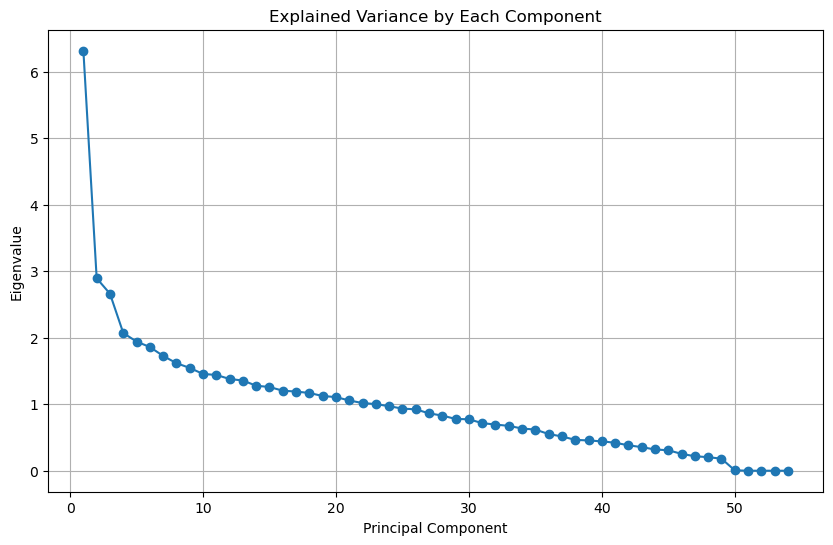

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Explained Variance by Each Component')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [15]:
import torch
torch.__version__

'2.1.1'

In [17]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from torch.optim import AdamW

def load_data(data_file):
    df = pd.read_excel(data_file)
    df = df.dropna(subset=['text', 'label'])
    texts = df['text'].tolist()
    labels = [1 if label == 'anxious' else 0 for label in df['label'].tolist()]
    return texts, labels

# Dataset class
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label)}

# BERT Classifier model
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

# Function to train the model with added debugging prints
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for i, batch in enumerate(data_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()

        if i % 10 == 0:
            print(f"Batch {i}, Loss: {loss.item()}")

    average_loss = total_loss / len(data_loader)
    print(f"Training complete. Average Loss: {average_loss}")

# Function to evaluate the model
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

# Function to predict sentiment
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
    return "anxious" if preds.item() == 1 else "not anxious"

# Parameters
data_file = './dataset.xlsx'
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 16
num_epochs = 4
learning_rate = 2e-5

# Loading and splitting data
texts, labels = load_data(data_file)
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Initializing tokenizer, datasets, and dataloaders
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Initializing model, optimizer, and scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training and evaluation with progress prints
for epoch in range(num_epochs):
    print(f"Starting Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Epoch {epoch + 1} complete. Validation Accuracy: {accuracy:.4f}")
    print(report)

# Saving the model
torch.save(model.state_dict(), "bert_classifier.pth")

test_sentences = [
    "I'm feeling really nervous and anxious about the meeting tomorrow.",
    "I had a great day at the park with my friends.",
    "I'm constantly worried about my future, it's making me lose sleep.",
    "What a wonderful experience it was watching the sunset!"
]

for sentence in test_sentences:
    sentiment = predict_sentiment(sentence, model, tokenizer, device, max_length)
    print(f"Sentence: '{sentence}'")
    print(f"Predicted sentiment: {sentiment}\n")

Starting Epoch 1/4
Batch 0, Loss: 0.9895171523094177
Batch 10, Loss: 0.3867207169532776
Batch 20, Loss: 0.15134574472904205
Batch 30, Loss: 0.053408797830343246
Batch 40, Loss: 0.019298003986477852
Batch 50, Loss: 0.008488322608172894
Batch 60, Loss: 0.00499318353831768
Batch 70, Loss: 0.0036453569773584604
Batch 80, Loss: 0.0028389079961925745
Batch 90, Loss: 0.0026109132450073957
Batch 100, Loss: 0.00214673881419003
Batch 110, Loss: 0.0018011281499639153
Batch 120, Loss: 0.0015381515258923173
Batch 130, Loss: 0.0015423473669216037
Batch 140, Loss: 0.0012504186015576124
Batch 150, Loss: 0.0013244092697277665
Batch 160, Loss: 0.0011145391035825014
Batch 170, Loss: 0.0009882779559120536
Batch 180, Loss: 0.0009403731673955917
Batch 190, Loss: 0.0008418782381340861
Batch 200, Loss: 0.0008511662599630654
Batch 210, Loss: 0.0008199710864573717
Batch 220, Loss: 0.0009009732166305184
Batch 230, Loss: 0.0007395355496555567
Batch 240, Loss: 0.0006683781975880265
Batch 250, Loss: 0.0006398383993

In [20]:
from joblib import dump

dump(stacking_clf, 'stacking_clf.joblib')

dump(log_reg, 'log_reg.joblib')

torch.save(model.state_dict(), "bert_classifier.pth")